<a href="https://colab.research.google.com/github/sm-lee-1/Caba_nlp/blob/main/DL51_using_convnets_with_small_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

/content


In [2]:
%cd drive/MyDrive/Caba2012_colab/

/content/drive/MyDrive/Caba2012_colab


In [10]:
%cd ..

/content


In [ ]:
!unzip cats_and_dogs_small.zip

Archive:  cats_and_dogs_small.zip
  inflating: cats_and_dogs_small/test/cats/cat.1970.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1994.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1989.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1993.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1854.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1988.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1907.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1995.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1996.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1997.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1991.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1999.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1929.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1973.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1983.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1998.jpg  
  inflating: cats_and_dogs_small/test/

In [ ]:
!rm cats_and_dogs_small.zip

In [11]:
import os, shutil
base_dir = './drive/MyDrive/Caba2012_colab/cats_and_dogs_small'

# 훈련, 검증, 테스트 분할을 위한 디렉토리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# 훈련용 고양이 사진 디렉토리
train_cats_dir = os.path.join(train_dir, 'cats')
# 훈련용 강아지 사진 디렉토리
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 검증용 디렉토리
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# 테스트용 디렉토리
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [4]:
train_cats_dir

'./drive/MyDrive/Caba2012_colab/cats_and_dogs_small/train/cats'

In [12]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [13]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [14]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [ ]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 강아지 이미지 전체 개수: 500


In [ ]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [ ]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 강아지 이미지 전체 개수: 500


In [15]:
import keras
keras.__version__

'2.4.3'

In [ ]:
!pip list

Package                       Version       
----------------------------- --------------
absl-py                       0.10.0        
alabaster                     0.7.12        
albumentations                0.1.12        
altair                        4.1.0         
appdirs                       1.4.4         
argon2-cffi                   20.1.0        
asgiref                       3.3.1         
astor                         0.8.1         
astropy                       4.2           
astunparse                    1.6.3         
async-generator               1.10          
atari-py                      0.2.6         
atomicwrites                  1.4.0         
attrs                         20.3.0        
audioread                     2.1.9         
autograd                      1.3           
Babel                         2.9.0         
backcall                      0.2.0         
beautifulsoup4                4.6.3         
bleach                        3.3.0         
blis      

In [ ]:
!pip uninstall keras
!pip uninstall tensorflow

Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/docs/*
    /usr/local/lib/python3.7/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.7/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3
Uninstalling tensorflow-2.4.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.4.1


In [ ]:
!pip install keras==2.3.1
!pip install tensorflow==2.2.0

     |████████████████████████████████| 378kB 16.5MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
ERROR: fancyimpute 0.4.3 requires tensorflow, which is not installed.
     |████████████████████████████████| 516.2MB 30kB/s 
     |████████████████████████████████| 460kB 47.2MB/s 
     |████████████████████████████████| 3.0MB 44kB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1


In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [19]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [20]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

데이터 전처리  
데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 합니다. 지금은 데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 대략 다음 과정을 따릅니다.
1. 사진 파일을 읽습니다.
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩합니다.
3. 그 다음 부동 소수 타입의 텐서로 변환합니다.
4. 픽셀 값(0에서 255사이)의 스케일을 [0,1] 사이로 조정합니다.(신경망은 작은 입력 값을 선호합니다.)

케라스는 keras.preprocessing.image에 이미지 처리를 위한 헬퍼 도구를 가지고 있다. 대표적인 클래스가 imageDataGenerator이며 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동 변환하는 파이썬 제너레이터를 만들어 준다.

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기:', data_batch.shape)
  print('배치 레이블 크기:', labels_batch.shape)
  break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


제너레이터를 사용한 데이터에 모델을 훈련
- `fit_generator` 메서드는 `fit` 메서드와 동일하되 데이터 제너레이터를 사용할 수 있다.
- 이 메서드는 첫 번째 매개변수로 입력과 타깃의 배치를 끝없이 반환하는 파이썬 제너레이터를 기대한다.
- 데이터가 끝없이 생성되기 때문에 케라스 모델에 하나의 에포크를 정의하기 위해 제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지 알려 주어야 한다. 
- `steps_per_epoch` 매개변수에서 이를 설정한다. 
- 제너레이터로부터 `steps_per_epoch` 개의 배치만큼 뽑은 다음, 즉 `steps_per_epoch` 횟수만큼 경사 하강법 단계를 실행한 다음에 훈련 프로세스는 다음 에포크로 넘어간다.
- 20개의 샘플이 하나의 배치이므로 2,000개의 샘플을 모두 처리할 때까지 100개의 배치를 뽑을 것이다.
- `fit_generator`를 사용할 때 `fit` 메서드와 마찬가지로 `validation_data` 매개변수를 전달할 수 있다. 
- 이 매개변수에는 데이터 제너레이터도 가능하지만 넘파이 배열의 튜플도 가능하다.
- `validation_data`로 제너레이터를 전달하면 검증 데이터의 배치를 끝없이 반환한다.
- 따라서 검증 데이터 제너레이터에서 얼마나 많은 배치를 추출하여 평가할지 `validation_steps` 매개변수에 지정해야 한다.

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 18s 180ms/step - loss: 0.6891 - acc: 0.5355 - val_loss: 0.7282 - val_acc: 0.5400
Epoch 2/30
100/100 [==============================] - 11s 111ms/step - loss: 0.6578 - acc: 0.6055 - val_loss: 0.6759 - val_acc: 0.6450
Epoch 3/30
100/100 [==============================] - 11s 110ms/step - loss: 0.6097 - acc: 0.6760 - val_loss: 0.5240 - val_acc: 0.6510
Epoch 4/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5597 - acc: 0.7055 - val_loss: 0.5119 - val_acc: 0.6730
Epoch 5/30
100/100 [==============================] - 11s 109ms/step - loss: 0.5279 - acc: 0.7360 - val_loss: 0.5526 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 11s 109ms/step - loss: 0.4991 - acc: 0.7540 - val_loss: 0.7241 - val_acc: 0.6410
Epoch 7/30
100/100 [==============================] - 11s 109ms/step - loss: 0.4743 - acc: 0.7680 - val_loss: 0.6578 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
# 모델 저장
model.save('drive/MyDrive/Caba2012_colab/cats_and_dogs_small_1.h5')

In [32]:
# 모델 불러오기
from keras.models import load_model
model = load_model('drive/MyDrive/Caba2012_colab/cats_and_dogs_small_1.h5')

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

NameError: ignored

In [ ]:
%cd drive/MyDrive/Caba2012_colab/

/content/drive/MyDrive/Caba2012_colab


In [ ]:
!unzip datasets-20210312T053106Z-001.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: datasets/aclImdb/train/pos/5759_10.txt  
  inflating: datasets/__MACOSX/aclImdb/train/pos/._5323_7.txt  
  inflating: datasets/__MACOSX/aclImdb/train/pos/._5545_8.txt  
  inflating: datasets/__MACOSX/aclImdb/train/neg/._6850_3.txt  
  inflating: datasets/__MACOSX/aclImdb/train/neg/._6189_1.txt  
  inflating: datasets/__MACOSX/aclImdb/train/pos/._5226_10.txt  
  inflating: datasets/__MACOSX/aclImdb/train/neg/._6441_1.txt  
  inflating: datasets/aclImdb/train/pos/5909_8.txt  
  inflating: datasets/__MACOSX/aclImdb/train/pos/._5219_7.txt  
  inflating: datasets/__MACOSX/aclImdb/train/neg/._6669_1.txt  
  inflating: datasets/__MACOSX/aclImdb/train/pos/._5206_7.txt  
  inflating: datasets/__MACOSX/aclImdb/train/pos/._5433_10.txt  
  inflating: datasets/aclImdb/train/pos/6044_10.txt  
  inflating: datasets/aclImdb/train/pos/6094_10.txt  
  inflating: datasets/__MACOSX/aclImdb/train/neg/._6056_2.txt  
  inflating: datasets/aclImdb/train/pos/585

### 데이터 증식 사용

- rotation_range는 랜덤하게 사진을 회전시킬 각도 범위입니다.(0-180 사이)
-

In [18]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [25]:
from keras.preprocessing import image
import os

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

In [28]:
img_path

'./drive/MyDrive/Caba2012_colab/cats_and_dogs_small/train/cats/cat.100.jpg'

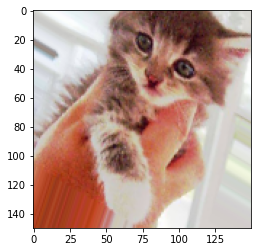

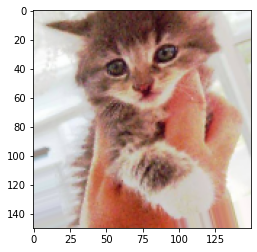

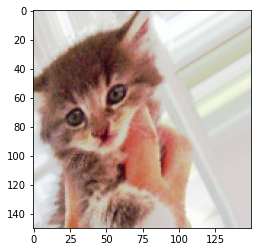

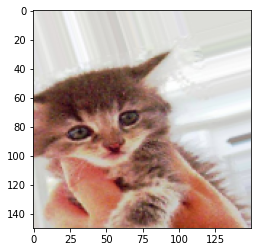

In [31]:
import matplotlib.pyplot as plt

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)

# (1,150,150,3) 크기로 변환
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i%4 == 0:
    break;
plt.show()    

In [ ]:
# 모델 불러오기
from keras.models import load_model
model = load_model('drive/MyDrive/Caba2012_colab/cats_and_dogs_small_1.h5')

In [35]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [40]:
from keras.preprocessing.image import ImageDataGenerator

# train 데이터 증식 처리
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# test 데이터는 증식되어서는 안된다.
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [41]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 563s 5s/step - loss: 6.0650 - acc: 0.5348 - val_loss: 0.6928 - val_acc: 0.5790
Epoch 2/100
100/100 [==============================] - 21s 207ms/step - loss: 0.8060 - acc: 0.5203 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 21s 206ms/step - loss: 0.7295 - acc: 0.5240 - val_loss: 0.6931 - val_acc: 0.5200
Epoch 4/100
100/100 [==============================] - 21s 208ms/step - loss: 0.7242 - acc: 0.5531 - val_loss: 0.6930 - val_acc: 0.5160
Epoch 5/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6936 - acc: 0.5485 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 6/100
100/100 [==============================] - 21s 205ms/step - loss: 0.7058 - acc: 0.5490 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/100
100/100 [==============================] - 20s 205ms/step - loss: 0.6878 - acc: 0.5404 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/100
100/100 [=============================

In [1]:
model.save('drive/MyDrive/Caba2012_colab/cats_and_dogs_small_2.h5')

NameError: ignored

In [ ]:
from keras.models import load_model
model = load_model('drive/MyDrive/Caba2012_colab/cats_and_dogs_small_2.h5')

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()